# Parameters for lowest RAM

Mouse vs fly reference genomes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
c_darkblue = "#4c6c9c"
c_darkgreen = "#5e8f7b"

In [49]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [50]:
df1 = pd.read_csv("cart_parameters.time", sep="\t")
df1["command"] = "valik-search"
df1["threads"] = 16
df1["ibf-fpr"] = 0.005
df1 = df1.rename(columns={"max-cap": "cart-max-cap"})
df2 = pd.read_csv("archive/parallelization_search_valik.time", sep="\t")
df3 = pd.read_csv("queue_param_search_valik.time", sep="\t")

In [51]:
df = pd.concat([df1, df2, df3], ignore_index=True,axis=0)
df["ibf-kb"] = round(df["ibf-size"].str.strip("G").str.replace(",", ".").astype(float) * 1024 * 1024, 0).astype(int)
df["search-kb"] = df["mem"] - df["ibf-kb"]
df["queries-in-mem"] = df["cart-max-cap"] * df["threads"] * df["max-queued"]

In [52]:
for col in df.columns:
    a = df[col].to_numpy()
    print(col + " \t " + str((a[0] == a).all()))

time 	 False
mem 	 False
error-code 	 True
bins 	 True
min-len 	 True
er 	 True
cmin 	 True
cmax 	 True
repeat-mask 	 False
repeats 	 False
ibf-size 	 False
matches 	 False
truth-set-matches 	 False
true-matches 	 False
missed 	 False
min_overlap 	 False
cart-max-cap 	 False
max-queued 	 False
command 	 True
threads 	 False
ibf-fpr 	 False
ibf-kb 	 False
search-kb 	 False
queries-in-mem 	 False


In [53]:
df = df.drop(labels = ["error-code", "min-len", "bins", "er", "cmin", "cmax", "command"], axis = 1)
df.head()

,time,mem,repeat-mask,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,cart-max-cap,max-queued,threads,ibf-fpr,ibf-kb,search-kb,queries-in-mem
0,154.11,14229632,--keep-all-repeats,156,"4,3G",75143,74641,74158,0.01,10,20000,1024,16,0.005,4508877,9720755,327680000
1,98.01,13190204,--keep-best-repeats,156,"4,3G",44325,74641,63850,0.15,10,20000,1024,16,0.005,4508877,8681327,327680000
2,34.80,11140172,NaN,156,"4,3G",2462,74641,4427,0.95,10,20000,1024,16,0.005,4508877,6631295,327680000
3,154.83,13517256,--keep-all-repeats,156,"4,3G",75135,74641,74158,0.01,10,5000,1024,16,0.005,4508877,9008379,81920000
4,98.23,12551388,--keep-best-repeats,156,"4,3G",44327,74641,63850,0.15,10,5000,1024,16,0.005,4508877,8042511,81920000


## Cart queue parameters

The cart queue is defined by the maximum number of carts in the queue and the size of a cart. Records are added into the cart by producer threads of local prefiltering and consumed by stellar search threads.

In [54]:
keep_all_df = df[df["repeat-mask"] == "--keep-all-repeats"]
keep_all_df["search-kb"].corr(keep_all_df["max-queued"])

0.7856057029724623

In [55]:
keep_all_df.head()

,time,mem,repeat-mask,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,cart-max-cap,max-queued,threads,ibf-fpr,ibf-kb,search-kb,queries-in-mem
0,154.11,14229632,--keep-all-repeats,156,"4,3G",75143,74641,74158,0.01,10,20000,1024,16,0.005,4508877,9720755,327680000
3,154.83,13517256,--keep-all-repeats,156,"4,3G",75135,74641,74158,0.01,10,5000,1024,16,0.005,4508877,9008379,81920000
6,154.21,13471524,--keep-all-repeats,156,"4,3G",75138,74641,74158,0.01,10,5000,512,16,0.005,4508877,8962647,40960000
9,154.25,13721288,--keep-all-repeats,156,"4,3G",75135,74641,74158,0.01,10,10000,1024,16,0.005,4508877,9212411,163840000
12,153.68,13527424,--keep-all-repeats,156,"4,3G",75141,74641,74158,0.01,10,10000,512,16,0.005,4508877,9018547,81920000


In [69]:
keep_best_df = df[(df["repeat-mask"] == "--keep-best-repeats") & (df["ibf-fpr"] == 0.005)].copy()
keep_best_df["mem"].corr(keep_best_df["max-queued"])

0.7758443491293353

In [86]:
keep_best_df["effective-query-count"] = keep_best_df["cart-max-cap"] * keep_best_df["threads"]
keep_best_df.head()

,time,mem,repeat-mask,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,cart-max-cap,max-queued,threads,ibf-fpr,ibf-kb,search-kb,queries-in-mem,effective-query-count
1,98.01,13190204,--keep-best-repeats,156,"4,3G",44325,74641,63850,0.15,10,20000,1024,16,0.005,4508877,8681327,327680000,320000
4,98.23,12551388,--keep-best-repeats,156,"4,3G",44327,74641,63850,0.15,10,5000,1024,16,0.005,4508877,8042511,81920000,80000
7,98.50,12458380,--keep-best-repeats,156,"4,3G",44325,74641,63850,0.15,10,5000,512,16,0.005,4508877,7949503,40960000,80000
10,97.81,12733912,--keep-best-repeats,156,"4,3G",44322,74641,63850,0.15,10,10000,1024,16,0.005,4508877,8225035,163840000,160000
13,98.04,12720052,--keep-best-repeats,156,"4,3G",44323,74641,63850,0.15,10,10000,512,16,0.005,4508877,8211175,81920000,160000


In [81]:
keep_best_df["threads"]

1     16
4     16
7     16
10    16
13    16
16    16
19    16
22    16
30     2
31     2
32     2
33     2
34    16
35    16
36    16
37    16
Name: threads, dtype: int64

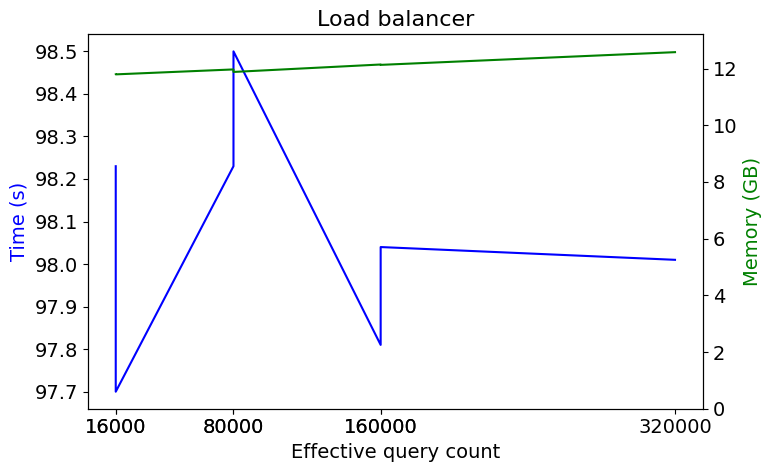

In [92]:
plot_df = keep_best_df
on_col = "effective-query-count"
plot_df = plot_df[plot_df["max-queued"] > 100]
plot_df = plot_df[plot_df["cart-max-cap"] > 100]

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
ax2 = ax1.twinx()
plot_df = plot_df.sort_values(on_col)
plot_df.mem = plot_df.mem / (1024 * 1024) 
ax1.plot(plot_df[on_col], plot_df["time"], 'b-', label = "Time (s)")
ax2.plot(plot_df[on_col], plot_df["mem"], 'g-', label = "Memory (GB)")
ax2.set_ylim([0, np.max(plot_df["mem"] * 1.05)])
ax1.set_xlabel('Effective query count')
ax1.set_ylabel('Time (s)', color='b')
ax2.set_ylabel('Memory (GB)', color='g')
ax1.set_xticks(plot_df[on_col])
ax1.set_title("Load balancer")
#fig.legend(loc = "upper right")
fig.tight_layout()
fig.savefig('load_balancing.png', dpi = 500)

Okay, of course it correlates but how much of an effect does it have?

In [11]:
keep_best_df[keep_best_df["search-kb"] == np.max(keep_best_df["search-kb"])]

,time,mem,repeat-mask,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,cart-max-cap,max-queued,threads,ibf-fpr,ibf-kb,search-kb,queries-in-mem
1,98.01,13190204,--keep-best-repeats,156,"4,3G",44325,74641,63850,0.15,10,20000,1024,16,0.005,4508877,8681327,327680000


In [12]:
keep_best_df[keep_best_df["search-kb"] == np.min(keep_best_df["search-kb"])]

,time,mem,repeat-mask,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,cart-max-cap,max-queued,threads,ibf-fpr,ibf-kb,search-kb,queries-in-mem
30,1051.88,10378368,--keep-best-repeats,156,"4,3G",44324,84323,69790,0.18,100,10,10,2,0.005,4508877,5869491,200


In [13]:
np.round((np.max(keep_best_df["search-kb"]) - np.min(keep_best_df["search-kb"])) / np.max(keep_best_df["search-kb"]) * 100, 2)

32.39

Decreasing the queue parameters reduced the search memory peak by 37%

In [14]:
time_at_max_mem = keep_best_df[keep_best_df["search-kb"] == np.max(keep_best_df["search-kb"])]["time"].values[0]
time_at_min_mem = keep_best_df[keep_best_df["search-kb"] == np.min(keep_best_df["search-kb"])]["time"].values[0]

In [15]:
np.round((time_at_max_mem - time_at_min_mem) / time_at_max_mem * 100, 2)

-973.24

And increased the runtime by 42%

## Parallelization

The number of threads determines the number of local prefiltering AND stellar search jobs.

In [133]:
parallel = pd.read_csv("parallelization_search_valik.time", sep = "\t")
parallel_entropy = parallel[parallel["bin-entropy-cutoff"] == 0.9].copy()
parallel_entropy = parallel_entropy.sort_values('threads')
parallel_pattern_count = parallel[parallel["bin-entropy-cutoff"] != 0.9].copy()
parallel_pattern_count = parallel_pattern_count.sort_values('threads')
parallel_entropy["repeat-mask"] = "entropy0.9"
parallel_pattern_count["repeat-mask"] = "pattern-count"
parallel = pd.concat([parallel_entropy, parallel_pattern_count])
parallel.drop(["repeat-flag", "bin-entropy-cutoff"], axis = 1, inplace = True)

In [121]:
parallel_entropy

,time,mem,error-code,command,bins,fpr,max-er,min-len,threads,minimiser,cmin,cmax,error-rate,repeat-flag,bin-entropy-cutoff,cart-max-cap,max-carts,repeats,matches,repeat-mask
13,7872.15,19327632,0,valik-search,1024,0.005,0.0267,150,1,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82267,entropy0.9
12,3904.72,17235896,0,valik-search,1024,0.005,0.0267,150,2,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82281,entropy0.9
11,995.01,18871012,0,valik-search,1024,0.005,0.0267,150,8,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82279,entropy0.9
10,509.17,22372848,0,valik-search,1024,0.005,0.0267,150,16,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82285,entropy0.9
9,374.12,28228624,0,valik-search,1024,0.005,0.0267,150,32,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82277,entropy0.9
8,253.36,40176440,0,valik-search,1024,0.005,0.0267,150,64,yes,0,254,0.0267,--keep-best-repeats,0.9,20000,1024,471,82278,entropy0.9


In [122]:
def merge_parallelization_runs(df):
    parallel_mean = pd.DataFrame(columns=df.columns.drop("repeat-mask"))
   
    i = 0
    for t in np.unique(df["threads"]):
        thread_slice = df[df["threads"] == t]
        parallel_mean.loc[i] = thread_slice.iloc[0]
        for col in df.columns.drop("repeat-mask"):
            a = df[col].to_numpy()
            if ((a[0] != a).any()): # if not all equal
                parallel_mean.loc[i, col] = np.mean(thread_slice[col])
        i = i + 1

    parallel_mean.threads = parallel_mean.threads.astype(int)
    return parallel_mean

In [123]:
mean_parallel = merge_parallelization_runs(parallel)
mean_parallel

,time,mem,error-code,command,bins,fpr,max-er,min-len,threads,minimiser,cmin,cmax,error-rate,cart-max-cap,max-carts,repeats,matches
0,5485.84,16643822.0,0,valik-search,1024,0.005,0.0267,150,1,yes,0,254,0.0267,20000,1024,471,56167.5
1,2731.485,15589236.0,0,valik-search,1024,0.005,0.0267,150,2,yes,0,254,0.0267,20000,1024,471,56173.0
2,794.08,15106200.0,0,valik-search,1024,0.005,0.0267,150,4,yes,0,254,0.0267,20000,1024,471,30069.0
3,703.945,17930272.0,0,valik-search,1024,0.005,0.0267,150,8,yes,0,254,0.0267,20000,1024,471,56173.5
4,363.555,21111702.0,0,valik-search,1024,0.005,0.0267,150,16,yes,0,254,0.0267,20000,1024,471,56176.0
5,253.205,26699862.0,0,valik-search,1024,0.005,0.0267,150,32,yes,0,254,0.0267,20000,1024,471,56171.5
6,175.63,38043288.0,0,valik-search,1024,0.005,0.0267,150,64,yes,0,254,0.0267,20000,1024,471,56172.5
7,86.32,46367848.0,0,valik-search,1024,0.005,0.0267,150,96,yes,0,254,0.0267,20000,1024,471,30068.0


In [124]:
mean_parallel[mean_parallel["mem"] == np.max(mean_parallel["mem"])]

,time,mem,error-code,command,bins,fpr,max-er,min-len,threads,minimiser,cmin,cmax,error-rate,cart-max-cap,max-carts,repeats,matches
7,86.32,46367848.0,0,valik-search,1024,0.005,0.0267,150,96,yes,0,254,0.0267,20000,1024,471,30068.0


In [125]:
mean_parallel[mean_parallel["mem"] == np.min(mean_parallel["mem"])]

,time,mem,error-code,command,bins,fpr,max-er,min-len,threads,minimiser,cmin,cmax,error-rate,cart-max-cap,max-carts,repeats,matches
2,794.08,15106200.0,0,valik-search,1024,0.005,0.0267,150,4,yes,0,254,0.0267,20000,1024,471,30069.0


In [126]:
(np.max(mean_parallel["mem"]) - np.min(mean_parallel["mem"])) / np.max(mean_parallel["mem"]) * 100

67.42095945449097

Decreasing the number of threads decreased the search RAM peak by 67%

In [127]:
time_at_max_mem = mean_parallel[mean_parallel["mem"] == np.max(mean_parallel["mem"])]["time"].values[0]
time_at_min_mem = mean_parallel[mean_parallel["mem"] == np.min(mean_parallel["mem"])]["time"].values[0]

In [128]:
np.round((time_at_max_mem - time_at_min_mem) / time_at_max_mem * 100, 2)

-819.93

And increased the runtime almost 10x

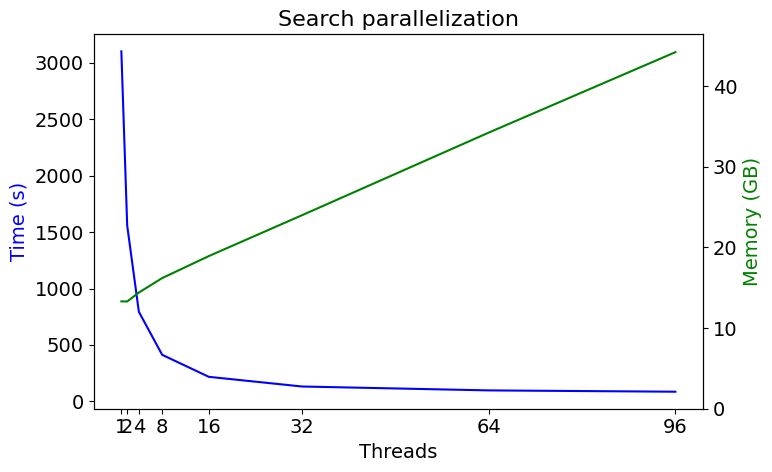

In [134]:
df = parallel_pattern_count.copy()
df.mem = df.mem / (1024 * 1024)

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
ax2 = ax1.twinx() 
ax1.plot(df["threads"], df["time"], 'b-', label = "Time (s)")
ax2.plot(df["threads"], df["mem"], 'g-', label = "Memory (GB)")
ax2.set_ylim([0, np.max(df["mem"] * 1.05)])
ax1.set_xlabel('Threads')
ax1.set_ylabel('Time (s)', color='b')
ax2.set_ylabel('Memory (GB)', color='g')
ax1.set_xticks(df["threads"])
#ax2.set_yticks(list(range(0, 45, 5)))
ax1.set_title("Search parallelization")
#fig.legend(loc = "upper right")
fig.tight_layout()
fig.savefig('search_parallelization.png', dpi = 500)

## IBF size

The smaller the requested false positive rate the bigger the required IBF size. For the largest FPR=0.05 the prefiltering would be insufficient and a Stellar only search is run. 

In [26]:
df = pd.read_csv("index_param_search_max_er0.025.time", sep="\t")
df["ibf-kb"] = round(df["ibf-size"].str.strip("G").str.replace(",", ".").astype(float) * 1024 * 1024, 0).astype(int)
df.head()

,time,mem,error-code,command,bins,threads,cart-max-cap,max-queued,min-len,er,...,repeat-mask,ibf-fpr,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,ibf-kb
0,286.54,21592848,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.001,283,13G,75168,84323,76904,0.09,100,13631488
1,282.28,14544920,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.005,286,"5,5G",75176,84323,76904,0.09,100,5767168
2,287.63,12905876,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.010,288,"3,9G",75168,84323,76904,0.09,100,4089446
3,510.88,49208832,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.050,388,"1,6G",51628,84323,67416,0.21,100,1677722
4,195.52,19071208,0,valik-search,512,16,15000,1024,150,0.025,...,--keep-all-repeats,0.001,164,"9,9G",75142,84323,76904,0.09,100,10380902


In [27]:
prefiltering = df[(df["ibf-fpr"] < 0.05) & (df["bins"] < 2048)].copy()
prefiltering.head()

,time,mem,error-code,command,bins,threads,cart-max-cap,max-queued,min-len,er,...,repeat-mask,ibf-fpr,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,ibf-kb
0,286.54,21592848,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.001,283,13G,75168,84323,76904,0.09,100,13631488
1,282.28,14544920,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.005,286,"5,5G",75176,84323,76904,0.09,100,5767168
2,287.63,12905876,0,valik-search,64,16,15000,1024,150,0.025,...,--keep-all-repeats,0.010,288,"3,9G",75168,84323,76904,0.09,100,4089446
4,195.52,19071208,0,valik-search,512,16,15000,1024,150,0.025,...,--keep-all-repeats,0.001,164,"9,9G",75142,84323,76904,0.09,100,10380902
5,194.55,13488784,0,valik-search,512,16,15000,1024,150,0.025,...,--keep-all-repeats,0.005,166,"4,4G",75145,84323,76904,0.09,100,4613734


In [28]:
prefiltering["search-kb"] = prefiltering["mem"] - prefiltering["ibf-kb"]
prefiltering["search-kb"].corr(prefiltering["bins"])

0.5432705574433903

In [29]:
prefiltering["search-kb"].corr(prefiltering["ibf-kb"])

-0.8813581271320443

The IBF size affects the number of false positives in search. Because of this the memory required for the rest of the search increases as the IBF size decreases.

In [30]:
prefiltering[prefiltering["search-kb"] == np.max(prefiltering["search-kb"])]

,time,mem,error-code,command,bins,threads,cart-max-cap,max-queued,min-len,er,...,ibf-fpr,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,ibf-kb,search-kb
10,191.64,12345816,0,valik-search,1024,16,15000,1024,150,0.025,...,0.01,122,"3,0G",75139,84323,76904,0.09,100,3145728,9200088


In [31]:
prefiltering[prefiltering["search-kb"] == np.min(prefiltering["search-kb"])]

,time,mem,error-code,command,bins,threads,cart-max-cap,max-queued,min-len,er,...,ibf-fpr,repeats,ibf-size,matches,truth-set-matches,true-matches,missed,min_overlap,ibf-kb,search-kb
0,286.54,21592848,0,valik-search,64,16,15000,1024,150,0.025,...,0.001,283,13G,75168,84323,76904,0.09,100,13631488,7961360


In [32]:
prefiltering["mem"].corr(prefiltering["ibf-fpr"])

-0.8900726002401225